In [1]:
#importing needed libraries
import scipy.io as sio
import os
import numpy as np
import torch
import mat73
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader , TensorDataset

In [8]:
#data_test = sio.loadmat('H_ang_quadriga_1_down.mat')
#print(data_test.keys())
#print(sio.loadmat('dataset/DATA_Htestin.mat')["HT"])
data_dict = mat73.loadmat('H_ang_quadriga_1_down.mat')['Hur_down']
#data_test = torch.tensor(sio.loadmat('dataset/DATA_Htestin.mat')["HT"], dtype=torch.float32)

In [9]:
data_dict.shape

(20000, 10, 32, 32)

In [ ]:
import numpy as np

def check_and_convert_complex_matrix(matrix):
    try:
        real_imag_matrices = []
        for sample_index in range(matrix.shape[0]):
            sample = matrix[sample_index, 5]  # Only consider the first sample from the second dimension
            if np.iscomplexobj(sample):
                print(f"Sample {sample_index} contains complex numbers.")
                # Check if there are non-zero imaginary parts
                if np.any(np.imag(sample)):
                    print(f"Sample {sample_index} contains non-zero imaginary values.")
                    # Initialize an array to store the real and imaginary parts
                    real_imag_matrix = np.zeros((2, sample.shape[0], sample.shape[1]), dtype=np.float64)

                    # Extract the real and imaginary parts
                    real_imag_matrix[0] = np.real(sample)
                    real_imag_matrix[1] = np.imag(sample)

                    real_imag_matrices.append(real_imag_matrix)
            else:
                print(f"Sample {sample_index} contains only real values.")

        if len(real_imag_matrices) > 0:
            return np.array(real_imag_matrices)
        else:
            return None
    except ValueError as e:
        print(f"Error: {e}")
        return None

# Assuming downlink is your original tensor with shape (20000, 10, 32, 32)
# # For demonstration purposes, I'll create a complex tensor downlink
# real_part = np.random.randn(20000, 10, 32, 32)
# imag_part = np.random.randn(20000, 10, 32, 32)
# downlink = real_part + 1j * imag_part

# Call the function
real_imag_matrices = check_and_convert_complex_matrix(data_dict)

# Display the shape of the resulting matrices to verify
if real_imag_matrices is not None:
    print(real_imag_matrices.shape)  # Shape will be (num_samples_with_imaginary_values, 2, 32, 32)

In [11]:
data_dict=[]

In [5]:
real_imag_matrices.shape

(20000, 2, 32, 32)

In [12]:
x_test = torch.tensor(real_imag_matrices, dtype=torch.float32)
x_test.shape

torch.Size([20000, 2, 32, 32])

In [13]:
def channel_visualization(image):
    fig, ax = plt.subplots()
    plot = ax.imshow(image, cmap=plt.cm.gray, interpolation='nearest', origin='upper')
    plt.colorbar(plot)
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    plt.show()

In [16]:
test_sample=[]
for i in range(0,9):
    test_sample.append(x_test[i,1,:,:])

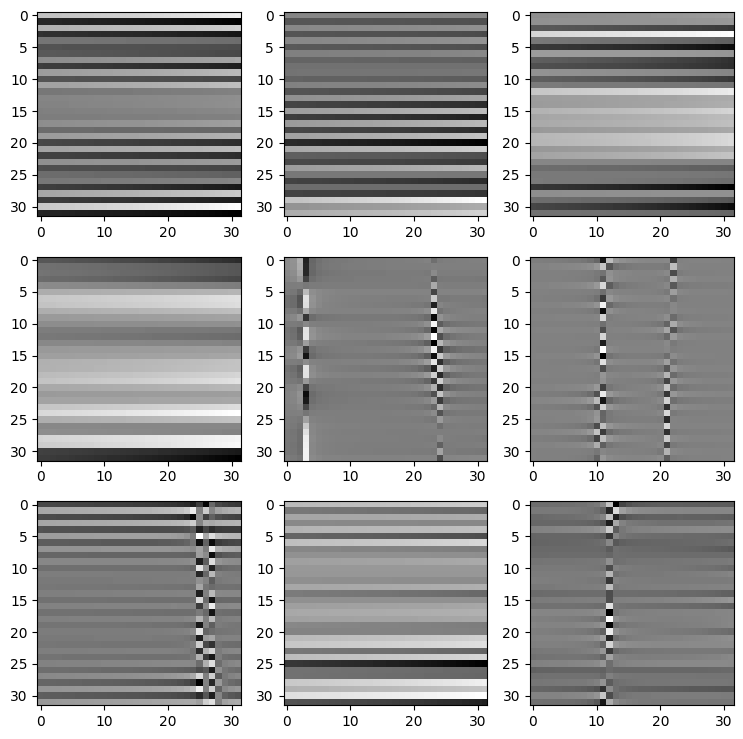

In [17]:
# show the data of the first channel
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_sample):
  #print(i)
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample, cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  #pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  #truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  #title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  # if pred_label == truth_label:
  #     plt.title(title_text, fontsize=10, c="g") # green text if correct
  # else:
  #     plt.title(title_text, fontsize=10, c="r") # red text if wrong
  # plt.axis(False);